In [1]:
import scenarion
import pandas as pd

from sklearn.ensemble import ExtraTreesRegressor

# Wine Example
# Table of Contents
1. [Description](#description)
1. [Load/prep the data](#load_data)
1. [Train the model](#train)
1. [Use Scenarion to interpret the model](#scenarion) (this is the only section that actually uses Scenarion)

# Description <a name='description'></a>
This example looks at wine data. The built model uses the characteristics of the wine to predict the perceived quality of the wine.

# Load and Prep the data <a name='load_data'></a>

In [2]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv

--2018-11-05 15:44:28--  https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.249
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.249|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 264426 (258K) [text/csv]
Saving to: ‘winequality-white.csv.1’

winequality-white.c 100%[===================>] 258.23K   737KB/s    in 0.4s    

2018-11-05 15:44:28 (737 KB/s) - ‘winequality-white.csv.1’ saved [264426/264426]



In [2]:
# Move the data into a pandas DataFrame
df = pd.read_csv('winequality-white.csv', sep=';')

# view a sample of the DataFrame
df.sample(4)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
2741,6.9,0.615,0.42,12.00,0.067,24.0,131.0,0.99727,3.19,0.34,9.3,5
372,6.6,0.905,0.19,0.80,0.048,17.0,204.0,0.99340,3.34,0.56,10.0,5
3344,6.9,0.380,0.29,13.65,0.048,52.0,189.0,0.99784,3.00,0.60,9.5,6
1312,9.6,0.250,0.54,1.30,0.040,16.0,160.0,0.99380,2.94,0.43,10.5,5


# Train the model <a name='train'></a>

In [3]:
y_col = 'quality'
x_cols = [col for col in df.columns if col != y_col]

train_x = df[x_cols]
train_y = df[y_col]

model = ExtraTreesRegressor(n_estimators=100, min_samples_leaf=10)
model.fit(train_x, train_y);

# Use Scenarion to interpret the model <a name='scenarion'></a>
## How does Alcohol content impact the perceived quality of a wine?

Testing Scenarios: 100%|██████████| 100/100 [00:03<00:00, 30.17it/s]


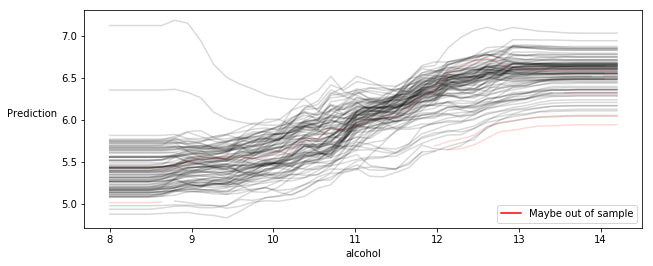

In [4]:
col_to_test = 'alcohol'
scenarios_df = scenarion.test_scenarios(model, df, x_cols, 
                    feat_to_test=col_to_test, n_samples=100)

**Fig Interpretation** There is a pretty clear and consistent trend that our model has captured: Up to about 13 ABV, increased alcohol content corresponds to increased perceived quality of wine. The leveling off on either end of the trend _could_ be a meaningful signal, or it could represent a limitation of decision trees (ie, decision trees don't really extrapolate).

## How does Volatile Acidity impact the perceived quality of a wine?

Testing Scenarios: 100%|██████████| 100/100 [00:03<00:00, 29.55it/s]


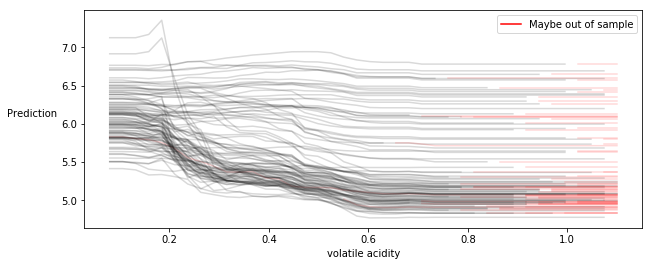

In [5]:
col_to_test = 'volatile acidity'
scenarios_df = scenarion.test_scenarios(model, df, x_cols, 
                    feat_to_test=col_to_test, n_samples=100)

**Fig Interpretation** In most cases, as volatile acidity increases, the perceived quality of the wine decreases. But it is important to note that in some cases, volatile acidity can increase without the perceived quality of the wine decreasing. This shows us (assuming our model is a good model) that there is just one simple relationship. For some wines (perhaps those with high residual sugar) volatile acidity doesn't really matter.